<a href="https://colab.research.google.com/github/palexey2006/Ml-Engineering/blob/main/CNN_models/FashionMnistCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

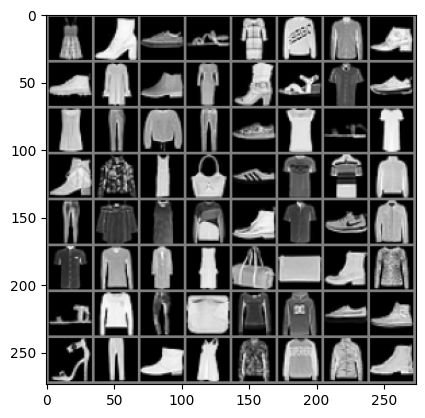

Training started
epoch 1 / 15, step 300 / 938, loss 0.7652
epoch 1 / 15, step 600 / 938, loss 0.3333
epoch 1 / 15, step 900 / 938, loss 0.3279
epoch 2 / 15, step 300 / 938, loss 0.3937
epoch 2 / 15, step 600 / 938, loss 0.3793
epoch 2 / 15, step 900 / 938, loss 0.3818
epoch 3 / 15, step 300 / 938, loss 0.2480
epoch 3 / 15, step 600 / 938, loss 0.3006
epoch 3 / 15, step 900 / 938, loss 0.4416
epoch 4 / 15, step 300 / 938, loss 0.2213
epoch 4 / 15, step 600 / 938, loss 0.1997
epoch 4 / 15, step 900 / 938, loss 0.2123
epoch 5 / 15, step 300 / 938, loss 0.1096
epoch 5 / 15, step 600 / 938, loss 0.1859
epoch 5 / 15, step 900 / 938, loss 0.2073
epoch 6 / 15, step 300 / 938, loss 0.1777
epoch 6 / 15, step 600 / 938, loss 0.2008
epoch 6 / 15, step 900 / 938, loss 0.1812
epoch 7 / 15, step 300 / 938, loss 0.1901
epoch 7 / 15, step 600 / 938, loss 0.1387
epoch 7 / 15, step 900 / 938, loss 0.1213
epoch 8 / 15, step 300 / 938, loss 0.3102
epoch 8 / 15, step 600 / 938, loss 0.1748
epoch 8 / 15, ste

In [12]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms



class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(in_features=128, out_features=10)
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.global_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x



def imshow(img):
    image = img * 0.5 + 0.5
    numpy_image = image.numpy()
    plt.imshow(np.transpose(numpy_image, (1, 2, 0)))
    plt.show()
batch_size = 64
transform = transforms.Compose([transforms.Grayscale(num_output_channels=3),transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

total_step = len(train_loader)
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


lr = 0.001
epochs = 15
criterion = nn.CrossEntropyLoss()
model = FashionCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)



print('Training started')
for epoch in range(epochs):
    for step, (images, labels) in enumerate(train_loader):
        images, labels = images, labels
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (step+1) % 300 == 0:
            print(f'epoch {epoch+1} / {epochs}, step {step+1} / {total_step}, loss {loss.item():.4f}')

print('Training finished')
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()

    accuracy = 100.0 * correct / total
    print(f'Accuracy: {accuracy:.4f}')




torch.save(model.state_dict(), 'Saved_Fashion_model.pth')